In [ ]:
!conda activate subjective

In [ ]:
!pip install matplotlib
!pip install seaborn

In [2]:
!pip install scikit-learn

In [3]:
!pip install plotly

In [9]:
!pip install nbformat==4.4.0  # Use the version that resolves the issue



In [5]:
import pandas as pd

# Assuming 'your_dataset.xlsx' is the name of your Excel file
df = pd.read_excel('final_dataset.xlsx')


In [10]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import plot

# Load your data from the Excel file into a Pandas DataFrame
df = pd.read_excel('final_dataset.xlsx')

# Select the tonality features for normalization
tonality_features = ['CLEAR', 'ASSERTIVE', 'CAUTIOUS', 'OPTIMISTIC', 'SPECIFIC', 'RELEVANT']
# Ensure values are in the range [0, 1, 2]
df[tonality_features] = df[tonality_features].clip(0, 2)

# Visualize the normalized distributions
# Visualize the normalized distributions
for feature in tonality_features:
    fig = make_subplots(rows=1, cols=1, subplot_titles=[f'Distribution of {feature} Tonality'])
    
    trace = go.Histogram(x=df[feature], nbinsx=3)
    
    fig.add_trace(trace)
    
    fig.update_layout(
        xaxis_title=f'{feature} Tonality',
        yaxis_title='Count',
        font=dict(family="Arial, sans-serif", size=12),
        showlegend=False
    )

    # Use plot instead of fig.show()
    plot(fig)

# Visualize the pairwise relationships with normalized data
fig_pairwise = px.scatter_matrix(df[tonality_features], title='Pairwise Relationships of Tonality Features')
fig_pairwise.update_layout(font=dict(family="Arial, sans-serif", size=12))
#fig_pairwise.show()

# Visualize box plots by category with normalized data
fig_box = px.box(df[tonality_features], title='Box Plot of Tonality Features')
fig_box.update_layout(font=dict(family="Arial, sans-serif", size=12))
#fig_box.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'variable=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x': array(['CLEAR', 'CLEAR', 'CLEAR', ..., 'RELEVANT', 'RELEVANT', 'RELEVANT'],
                         dtype=object),
              'x0': ' ',
              'xaxis': 'x',
              'y': array([2, 2, 2, ..., 2, 2, 2]),
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'font': {'family': 'Arial, sans-serif', 'size': 12},
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Box Plot of Tonality Features'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'variable'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
})

In [20]:
import pandas as pd
import plotly.express as px
from plotly.offline import plot

# Load your data from the Excel file into a Pandas DataFrame
df = pd.read_excel('final_dataset.xlsx')

# Select the tonality features for probability calculation
tonality_features = ['CLEAR', 'ASSERTIVE', 'CAUTIOUS', 'OPTIMISTIC', 'SPECIFIC', 'RELEVANT']

# Create three separate DataFrames for each probability
prob_0_df = pd.DataFrame(index=tonality_features, columns=df.index)
prob_1_df = pd.DataFrame(index=tonality_features, columns=df.index)
prob_2_df = pd.DataFrame(index=tonality_features, columns=df.index)

# Calculate probabilities for each tonality feature
for feature in tonality_features:
    prob_0_df.loc[feature] = (df[feature] == 0).astype(int)
    prob_1_df.loc[feature] = (df[feature] == 1).astype(int)
    prob_2_df.loc[feature] = (df[feature] == 2).astype(int)

prob_0_df = prob_0_df.mean(axis=1)
prob_1_df = prob_1_df.mean(axis=1)
prob_2_df = prob_2_df.mean(axis=1)

# Visualize the probabilities as float values
fig_prob_0 = px.bar(x=tonality_features, y=prob_0_df,
                    labels={'y': 'Probability', 'x': 'Tonality Feature'},
                    title='Probability of Tonality Features Being 0')
fig_prob_0.update_layout(font=dict(family="Arial, sans-serif", size=12))

fig_prob_1 = px.bar(x=tonality_features, y=prob_1_df,
                    labels={'y': 'Probability', 'x': 'Tonality Feature'},
                    title='Probability of Tonality Features Being 1')
fig_prob_1.update_layout(font=dict(family="Arial, sans-serif", size=12))

fig_prob_2 = px.bar(x=tonality_features, y=prob_2_df,
                    labels={'y': 'Probability', 'x': 'Tonality Feature'},
                    title='Probability of Tonality Features Being 2')
fig_prob_2.update_layout(font=dict(family="Arial, sans-serif", size=12))

# Use plot instead of fig.show()
plot(fig_prob_0)
plot(fig_prob_1)
plot(fig_prob_2)


'temp-plot.html'

In [21]:
import pandas as pd
import plotly.express as px
from plotly.offline import plot

# Load your data from the Excel file into a Pandas DataFrame
df = pd.read_excel('final_dataset.xlsx')

# Select the tonality features for probability calculation
tonality_features = ['CLEAR', 'ASSERTIVE', 'CAUTIOUS', 'OPTIMISTIC', 'SPECIFIC', 'RELEVANT']

# Create separate DataFrames for each probability
prob_0_df = pd.DataFrame(index=tonality_features, columns=df.index)
prob_2_df = pd.DataFrame(index=tonality_features, columns=df.index)

# Calculate probabilities for 0s and 2s for 'CAUTIOUS' and 'OPTIMISTIC' features
for feature in ['CAUTIOUS', 'OPTIMISTIC']:
    prob_0_df.loc[feature] = (df[feature] == 0).astype(int)
    prob_2_df.loc[feature] = (df[feature] == 2).astype(int)

prob_0_df = prob_0_df.mean(axis=1)
prob_2_df = prob_2_df.mean(axis=1)

# Visualize the probabilities as float values
fig_prob_0 = px.bar(x=['CAUTIOUS_0', 'OPTIMISTIC_0'], y=[prob_0_df['CAUTIOUS'], prob_0_df['OPTIMISTIC']],
                    labels={'y': 'Probability', 'x': 'Tonality Feature'},
                    title='Probability of 0s for CAUTIOUS and OPTIMISTIC')
fig_prob_0.update_layout(font=dict(family="Arial, sans-serif", size=12))

fig_prob_2 = px.bar(x=['CAUTIOUS_2', 'OPTIMISTIC_2'], y=[prob_2_df['CAUTIOUS'], prob_2_df['OPTIMISTIC']],
                    labels={'y': 'Probability', 'x': 'Tonality Feature'},
                    title='Probability of 2s for CAUTIOUS and OPTIMISTIC')
fig_prob_2.update_layout(font=dict(family="Arial, sans-serif", size=12))

# Use plot instead of fig.show()
plot(fig_prob_0)
plot(fig_prob_2)


'temp-plot.html'

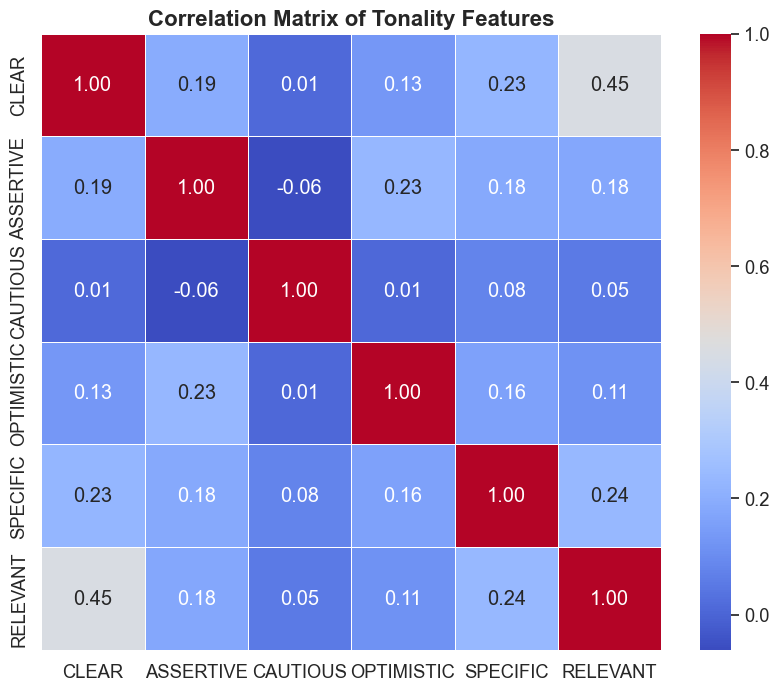

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data from the Excel file into a Pandas DataFrame
df = pd.read_excel('final_dataset.xlsx')

# Select the tonality features for correlation calculation
tonality_features = ['CLEAR', 'ASSERTIVE', 'CAUTIOUS', 'OPTIMISTIC', 'SPECIFIC', 'RELEVANT']

# Create a DataFrame containing only the tonality features
tonality_df = df[tonality_features]

# Calculate the correlation matrix
correlation_matrix = tonality_df.corr()

# Set a custom font
sns.set(font_scale=1.2, style="whitegrid")

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
heatmap.set_title('Correlation Matrix of Tonality Features', fontdict={'fontsize': 16, 'fontweight': 'bold'})

plt.show()
